In [273]:
import pandas as pd
import supy as sp
import matplotlib.pyplot as plt
from functions.night import *
from functions.dict_legend import *
in_folder = '../data/'
sp.show_version()

SuPy version: 2023.7.3.dev0
-------------


In [274]:
s_rc = in_folder + 'sample_data/RunControl.nml'         # OHM. Sampledata Q* modelled with L↓ modelled using air temperature and relative humidity supplied in meteorological forcing file [Loridan et al., 2011]. Zenith angle not accounted for in albedo calculation.d
s2_rc = in_folder + 'sample_data2/RunControl.nml'       # Sampledata SpartacusESTM, standard values in GridLayout
s3_rc = in_folder + 'sample_data3/RunControl.nml'       # Sampledata SpartacusESTM Thicker first layer wall all three layers. 1.2 instad of .2
s3x_rc = in_folder + 'sample_data3x/RunControl.nml'     # Sampledata SpartacusESTM Thicker first layer wall all three layers. 1.2 and 1.1 on second layer
s4_rc = in_folder + 'sample_data4/RunControl.nml'       # Sampledata SpartacusESTM wall albedo lowered .25 instad of .5
s5_rc = in_folder + 'sample_data5/RunControl.nml'       # Sampledata SpartacusESTM wall emissivity lower .9 instead of .95
s6_rc = in_folder + 'sample_data6/RunControl.nml'       # Sampledata SpartacusESTM Thermal conductivity of layer 1 lower. .8 instead of 1.2
s7_rc = in_folder + 'sample_data7/RunControl.nml'       # Sampledata SpartacusESTM Thermal conductivity of layer 2 (insulation) lower. .2 instead of 1.2

df_state_init_s = sp.init_supy(s_rc)
df_state_init_s2 = sp.init_supy(s2_rc)
df_state_init_s3 = sp.init_supy(s3_rc)
df_state_init_s3x = sp.init_supy(s3x_rc)
df_state_init_s4 = sp.init_supy(s4_rc)
df_state_init_s5 = sp.init_supy(s5_rc)
df_state_init_s6 = sp.init_supy(s6_rc)
df_state_init_s7 = sp.init_supy(s7_rc)

2024-02-22 10:50:48,937 - SuPy - INFO - All cache cleared.
2024-02-22 10:50:51,035 - SuPy - INFO - All cache cleared.
2024-02-22 10:50:52,783 - SuPy - INFO - All cache cleared.
2024-02-22 10:50:54,669 - SuPy - INFO - All cache cleared.
2024-02-22 10:50:56,539 - SuPy - INFO - All cache cleared.
2024-02-22 10:50:58,358 - SuPy - INFO - All cache cleared.
2024-02-22 10:51:00,273 - SuPy - INFO - All cache cleared.
2024-02-22 10:51:02,102 - SuPy - INFO - All cache cleared.


In [275]:
# standard settings
#print(df_state_init_s.columns.tolist())
df_state_init_s.filter(like='sfr')


var     sfr_surf                                  
ind_dim     (0,)  (1,) (2,)  (3,)  (4,) (5,)  (6,)
grid                                              
1           0.43  0.38  0.0  0.02  0.03  0.0  0.14

In [276]:
# standard wall thickness
df_state_init_s2.loc[:, 'dz_wall']

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)","(2, 0)","(2, 1)","(2, 2)","(2, 3)","(2, 4)"
grid,,,,,,,,,,,,,,,
1,0.2,0.1,0.1,0.01,0.01,0.2,0.1,0.1,0.01,0.01,0.2,0.1,0.1,0.01,0.01


In [277]:
# standard wall cp
df_state_init_s2.loc[:, 'cp_wall']

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)","(2, 0)","(2, 1)","(2, 2)","(2, 3)","(2, 4)"
grid,,,,,,,,,,,,,,,
1,3000000.0,2000000.0,2000000.0,2000000.0,2000000.0,2000000.0,3000000.0,2000000.0,2000000.0,2000000.0,2000000.0,3000000.0,2000000.0,2000000.0,2000000.0


In [278]:
# standard wall k
df_state_init_s2.loc[:, 'k_wall']

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)","(2, 0)","(2, 1)","(2, 2)","(2, 3)","(2, 4)"
grid,,,,,,,,,,,,,,,
1,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2


In [279]:
# wall with new k in insulation layer (2)
df_state_init_s7.loc[:, 'k_wall']

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)","(2, 0)","(2, 1)","(2, 2)","(2, 3)","(2, 4)"
grid,,,,,,,,,,,,,,,
1,1.2,0.2,1.2,1.2,1.2,1.2,0.2,1.2,1.2,1.2,1.2,0.2,1.2,1.2,1.2


In [280]:
# Metdata 
grid = df_state_init_s.index[0]
df_forcing = sp.load_forcing_grid(s_rc, grid)
s = '2012 07 1'
s2 = '2012 07 10'
e = '2012 07 31'

# # warm week 2012  to reduce time for test setup
df_forcing=df_forcing.loc[s: e].iloc[1:]
df_forcing2=df_forcing.loc[s2: e].iloc[1:]


2024-02-22 10:51:44,095 - SuPy - INFO - All cache cleared.


In [281]:
df_output_s2, df_state_final_s2 = sp.run_supy(df_forcing, df_state_init_s2)
df_output_s2b, df_state_final_s2b = sp.run_supy(df_forcing2, df_state_init_s2)

2024-02-22 10:51:57,213 - SuPy - INFO - ====================
2024-02-22 10:51:57,214 - SuPy - INFO - Simulation period:
2024-02-22 10:51:57,215 - SuPy - INFO -   Start: 2012-07-01 00:05:00
2024-02-22 10:51:57,217 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-02-22 10:51:57,219 - SuPy - INFO - 
2024-02-22 10:51:57,220 - SuPy - INFO - No. of grids: 1
2024-02-22 10:51:57,221 - SuPy - INFO - SuPy is running in serial mode
2024-02-22 10:57:46,774 - SuPy - INFO - Execution time: 349.6 s
2024-02-22 10:57:46,775 - SuPy - INFO - ====================

2024-02-22 10:57:46,780 - SuPy - INFO - ====================
2024-02-22 10:57:46,781 - SuPy - INFO - Simulation period:
2024-02-22 10:57:46,783 - SuPy - INFO -   Start: 2012-07-10 00:05:00
2024-02-22 10:57:46,785 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-02-22 10:57:46,786 - SuPy - INFO - 
2024-02-22 10:57:46,787 - SuPy - INFO - No. of grids: 1
2024-02-22 10:57:46,790 - SuPy - INFO - SuPy is running in serial mode
2024-02-22 11:01:48,517 - 

<AxesSubplot:title={'center':'Testing spinup time for Spartacus'}, xlabel='datetime'>

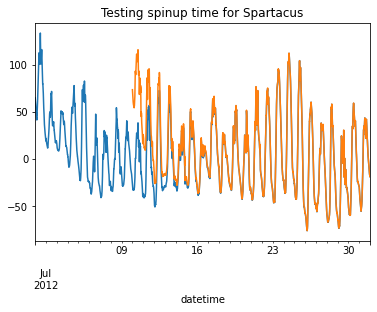

In [282]:
# check spin-up time
df_output_s2.SUEWS.loc[grid].loc[:,'QS'].plot(title='Testing spinup time for Spartacus')
df_output_s2b.SUEWS.loc[grid].loc[:,'QS'].plot()

2024-02-22 11:05:09,577 - SuPy - INFO - All cache cleared.


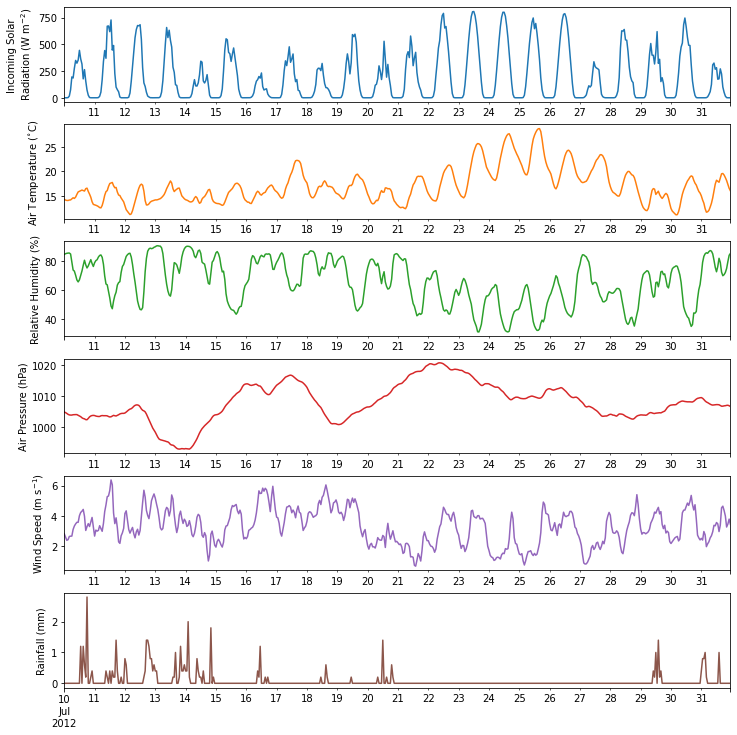

In [283]:
# looks like one week spinup is ok
#load full dataset again and select short period for further inspection
df_forcing = sp.load_forcing_grid(s_rc, grid)
df_forcing=df_forcing.loc[s2: e].iloc[1:]


# plot forcing data
df_plot_forcing_x = df_forcing.loc[:, list_var_forcing].copy().shift(
    -1).dropna(how='any')
df_plot_forcing = df_plot_forcing_x.resample('1h').mean()
df_plot_forcing['rain'] = df_plot_forcing_x['rain'].resample('1h').sum()

axes = df_plot_forcing.plot(
    subplots=True,
    figsize=(10, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])

# Run

In [284]:
df_output_s, df_state_final_s = sp.run_supy(df_forcing, df_state_init_s)
df_output_s2, df_state_final_s2 = sp.run_supy(df_forcing, df_state_init_s2)
df_output_s3, df_state_final_s3 = sp.run_supy(df_forcing, df_state_init_s3)
df_output_s3x, df_state_final_s3x = sp.run_supy(df_forcing, df_state_init_s3x)
df_output_s4, df_state_final_s4 = sp.run_supy(df_forcing, df_state_init_s4)
df_output_s5, df_state_final_s5 = sp.run_supy(df_forcing, df_state_init_s5)
df_output_s6, df_state_final_s6 = sp.run_supy(df_forcing, df_state_init_s6)
df_output_s7, df_state_final_s7 = sp.run_supy(df_forcing, df_state_init_s7)

2024-02-22 11:05:33,060 - SuPy - INFO - ====================
2024-02-22 11:05:33,061 - SuPy - INFO - Simulation period:
2024-02-22 11:05:33,062 - SuPy - INFO -   Start: 2012-07-10 00:05:00
2024-02-22 11:05:33,063 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-02-22 11:05:33,064 - SuPy - INFO - 
2024-02-22 11:05:33,065 - SuPy - INFO - No. of grids: 1
2024-02-22 11:05:33,066 - SuPy - INFO - SuPy is running in serial mode
2024-02-22 11:05:37,181 - SuPy - INFO - Execution time: 4.1 s
2024-02-22 11:05:37,182 - SuPy - INFO - ====================

2024-02-22 11:05:37,186 - SuPy - INFO - ====================
2024-02-22 11:05:37,186 - SuPy - INFO - Simulation period:
2024-02-22 11:05:37,187 - SuPy - INFO -   Start: 2012-07-10 00:05:00
2024-02-22 11:05:37,189 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-02-22 11:05:37,192 - SuPy - INFO - 
2024-02-22 11:05:37,196 - SuPy - INFO - No. of grids: 1
2024-02-22 11:05:37,198 - SuPy - INFO - SuPy is running in serial mode
2024-02-22 11:09:39,510 - Su

In [285]:
# Start and end date for inspection
s = '2012-07-10'
e = '2012-07-30'

# OHM
# Spartacus_2           Sampledata Spartacus, standard values in GridLayout
# Spartacus_3           Sampledata Spartacus Thicker first layer wall all three layers. 1.2 instad of .2
# Spartacus_3x          Sampledata Spartacus Thicker first layer wall all three layers. 1.2 and 1.1 on second layer
# Spartacus_4           Sampledata Spartacus wall albedo lowered .25 instad of .5
# Spartacus_5           Sampledata Spartacus wall emissivity lower .9 instead of .95
# Spartacus_6           Sampledata Spartacus Thermal conductivity of layer 1 lower. .8 instead of 1.2
# Spartatus_7           Sampledata Spartacus Thermal conductivity of layer 2 lower. .2 instead of 1.2

outputIn = [df_output_s.loc[grid].loc[s:e,:],df_output_s2.loc[grid].loc[s:e,:], df_output_s3.loc[grid].loc[s:e,:], df_output_s3x.loc[grid].loc[s:e,:],df_output_s4.loc[grid].loc[s:e,:], df_output_s5.loc[grid].loc[s:e,:], df_output_s6.loc[grid].loc[s:e,:], df_output_s7.loc[grid].loc[s:e,:], ]
namesIn = ['OHM', 'SS_default_alb0.5_emis0.95_k1.2', 'SS_thickerwallAll', 'SS_thickerwallVary','SS_alb0.25', 'SS_emis0.90','SS_k0.8first', 'SS_k0.2second',]
df_output_merge_x=pd.concat(outputIn,axis=1,join='inner', keys = namesIn).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1) #.loc[grid]
df_merge=df_output_merge_x.SUEWS

outputInNoOHM = [df_output_s2.loc[grid].loc[s:e,:], df_output_s3.loc[grid].loc[s:e,:], df_output_s3x.loc[grid].loc[s:e,:],df_output_s4.loc[grid].loc[s:e,:], df_output_s5.loc[grid].loc[s:e,:], df_output_s6.loc[grid].loc[s:e,:], df_output_s7.loc[grid].loc[s:e,:], ]
namesInNoOHM = ['SS_default_alb0.5_emis0.95_k1.2', 'SS_thickerwallAll', 'SS_thickerwallVary','SS_alb0.25', 'SS_emis0.90','SS_k0.8first', 'SS_k0.2second',]
df_output_merge_xNOOHM=pd.concat(outputInNoOHM,axis=1,join='inner', keys = namesInNoOHM).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1) #.loc[grid]
df_mergeNoOHM=df_output_merge_xNOOHM.SUEWS

# add available energy, AE
df_merge=df_merge.stack().eval('AE=QN+QF-QS').unstack()

#df_merge = merge_output([df_output_s2, df_output_s3, df_output_s3x,df_output_s4, df_output_s5, df_output_s6, df_output_s7, ], ['Spartacus_2', 'Spartacus_3', 'Spartacus_3x','Spartacus_4', 'Spartacus_5','Spartacus_6', 'Spartacus_7',])

# Plot

In [286]:
# Start and end date for inspection
s = '2012-07-21'
e = '2012-07-30'

In [287]:
df_merge = df_merge.stack().eval('BowenRatio=QH/QE').unstack()
df_merge = df_merge.stack().eval('QS_f=QS/(QN+QF)').unstack()
df_merge = df_merge.stack().eval('QH_f=QH/(QN+QF)').unstack()
df_merge = df_merge.stack().eval('QE_f=QE/(QN+QF)').unstack()


<AxesSubplot:title={'center':'Qs for one warm week in July'}, xlabel='datetime'>

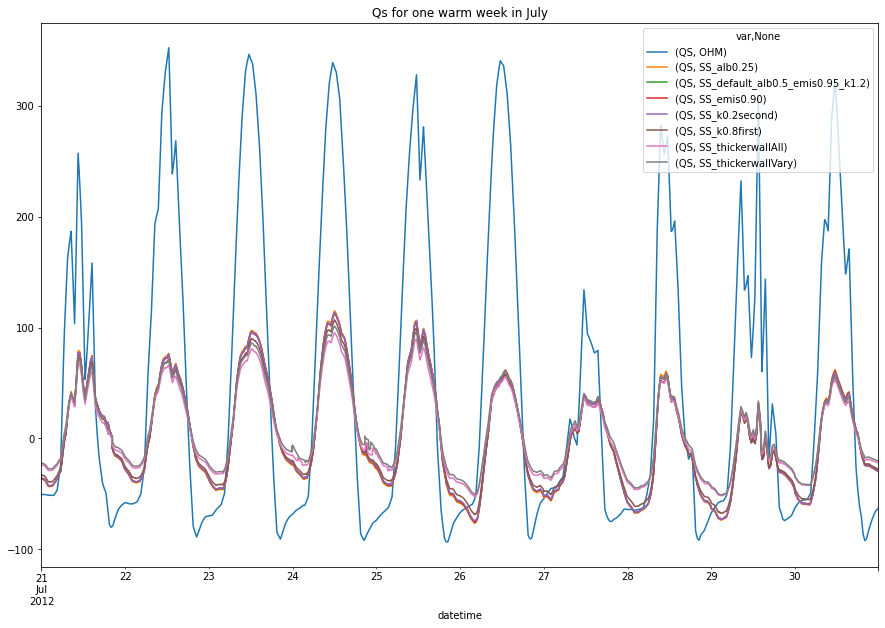

In [288]:
var = 'QS'

df_merge.loc[s:e,[var]].plot(figsize=(15,10), title='Qs for one warm week in July')

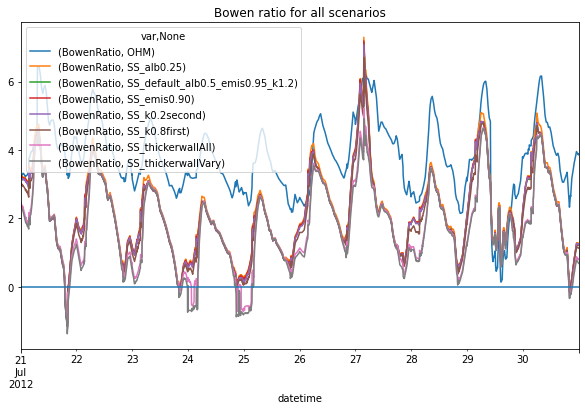

In [289]:
#This is probably not correct as we use very short spin-up time

var = 'BowenRatio'

# s = '2012-07-28 15:00'
# e = '2012-07-28 17:00'

ax = df_merge.loc[s:e,[var]].plot(figsize=(10,6), title='Bowen ratio for all scenarios')
# df_merge.loc[s:e,[var]]

ax.axhline(0,0)

var                 BowenRatio                                             \
                           OHM SS_alb0.25 SS_default_alb0.5_emis0.95_k1.2   
datetime                                                                    
2012-07-26 00:00:00   2.613386   1.842233                        1.791848   
2012-07-26 00:05:00   2.603428   1.840981                        1.790227   
2012-07-26 00:10:00   2.593360   1.843068                        1.791976   
2012-07-26 00:15:00   2.583170   1.845845                        1.794505   
2012-07-26 00:20:00   2.572847   1.849275                        1.797987   
...                        ...        ...                             ...   
2012-07-30 23:35:00   3.886121   1.279027                        1.224744   
2012-07-30 23:40:00   3.876662   1.278135                        1.223585   
2012-07-30 23:45:00   3.867290   1.277216                        1.222415   
2012-07-30 23:50:00   3.857992   1.261246                        1.221232   
2012-07-30 23:55:00   3.892864   1.265474                        1.210769   

var                                                                           \
                    SS_emis0.90 SS_k0.2second SS_k0.8first SS_thickerwallAll   
datetime                                                                       
2012-07-26 00:00:00    1.809365      1.759208     1.592353          1.136002   
2012-07-26 00:05:00    1.807870      1.757136     1.590268          1.133114   
2012-07-26 00:10:00    1.809725      1.758452     1.589832          1.125309   
2012-07-26 00:15:00    1.812268      1.760457     1.589736          1.117770   
2012-07-26 00:20:00    1.814986      1.762740     1.589142          1.106623   
...                         ...           ...          ...               ...   
2012-07-30 23:35:00    1.230684      1.259671     1.150612          0.825950   
2012-07-30 23:40:00    1.244959      1.259045     1.147796          0.818488   
2012-07-30 23:45:00    1.228839      1.242651     1.144924          0.791019   
2012-07-30 23:50:00    1.227886      1.256561     1.142013          0.801914   
2012-07-30 23:55:00    1.232195      1.246669     1.132246          0.809907   

var                                     
                    SS_thickerwallVary  
datetime                                
2012-07-26 00:00:00           1.025810  
2012-07-26 00:05:00           1.023055  
2012-07-26 00:10:00           1.010157  
2012-07-26 00:15:00           1.007375  
2012-07-26 00:20:00           0.998660  
...                                ...  
2012-07-30 23:35:00           0.727256  
2012-07-30 23:40:00           0.719088  
2012-07-30 23:45:00           0.710809  
2012-07-30 23:50:00           0.702415  
2012-07-30 23:55:00           0.685641  

[1440 rows x 8 columns]

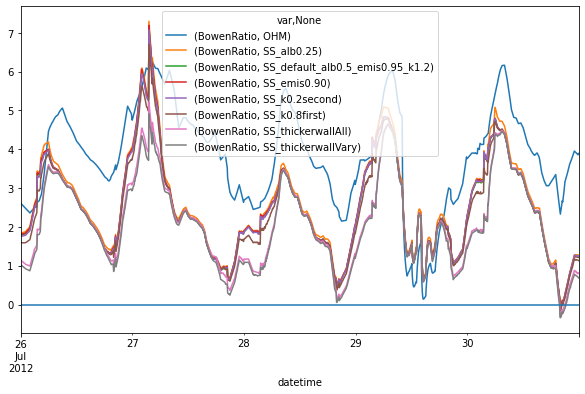

In [290]:
var = 'BowenRatio'
s = '2012-07-26'
e = '2012-07-30'

ax = df_merge.loc[s:e,[var]].plot(figsize=(10,6))
ax.axhline(0,0)

df_merge.loc[s:e,[var]]


var                 BowenRatio                                             \
                           OHM SS_alb0.25 SS_default_alb0.5_emis0.95_k1.2   
datetime                                                                    
2012-07-26 18:30:00   3.243792   1.463575                        1.374727   
2012-07-26 18:35:00   3.237095   1.463083                        1.367963   
2012-07-26 18:40:00   3.229968   1.451413                        1.356429   
2012-07-26 18:45:00   3.205748   1.443466                        1.348587   
2012-07-26 18:50:00   3.197917   1.435645                        1.347032   
2012-07-26 18:55:00   3.189900   1.434356                        1.334340   
2012-07-26 19:00:00   3.181819   1.420204                        1.326684   

var                                                                           \
                    SS_emis0.90 SS_k0.2second SS_k0.8first SS_thickerwallAll   
datetime                                                                       
2012-07-26 18:30:00    1.376481      1.369976     1.370504          1.322764   
2012-07-26 18:35:00    1.375569      1.362993     1.361605          1.308857   
2012-07-26 18:40:00    1.364312      1.351216     1.347851          1.297633   
2012-07-26 18:45:00    1.356812      1.343107     1.342703          1.276725   
2012-07-26 18:50:00    1.355634      1.335324     1.327581          1.263404   
2012-07-26 18:55:00    1.343365      1.327636     1.322673          1.244575   
2012-07-26 19:00:00    1.336174      1.320157     1.312264          1.224471   

var                                     
                    SS_thickerwallVary  
datetime                                
2012-07-26 18:30:00           1.269827  
2012-07-26 18:35:00           1.254067  
2012-07-26 18:40:00           1.236312  
2012-07-26 18:45:00           1.222226  
2012-07-26 18:50:00           1.197371  
2012-07-26 18:55:00           1.180729  
2012-07-26 19:00:00           1.152074

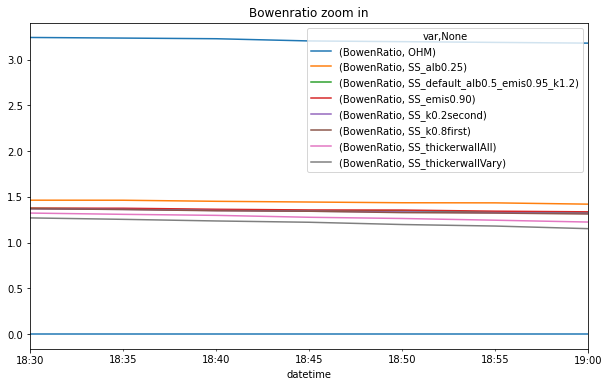

In [291]:
var = 'BowenRatio'

s = '2012-07-26 18:30'
e = '2012-07-26 19:00'

ax = df_merge.loc[s:e,[var]].plot(figsize=(10,6),title='Bowenratio zoom in')
ax.axhline(0,0)

df_merge.loc[s:e,[var]]

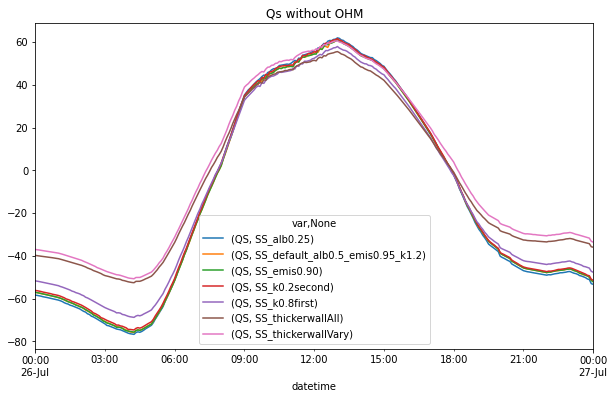

In [292]:
var = 'QS'

s = '2012-07-26 00:00'
e = '2012-07-27 00:00'

ax = df_mergeNoOHM.loc[s:e,[var]].plot(figsize=(10,6), title='Qs without OHM')



<AxesSubplot:xlabel='datetime'>

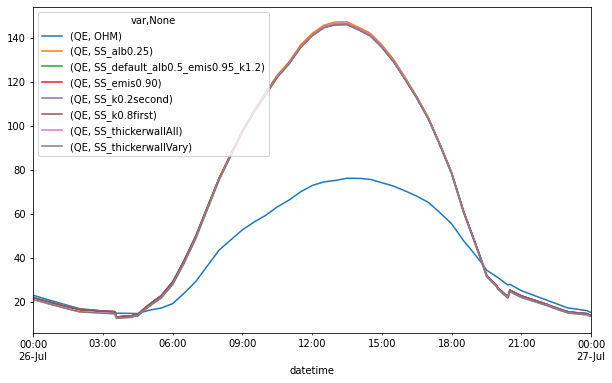

In [293]:
var = 'QE'

df_merge.loc[s:e,[var]].plot(figsize=(10,6))
#df_merge.loc[s:e,[var]]


<AxesSubplot:xlabel='datetime'>

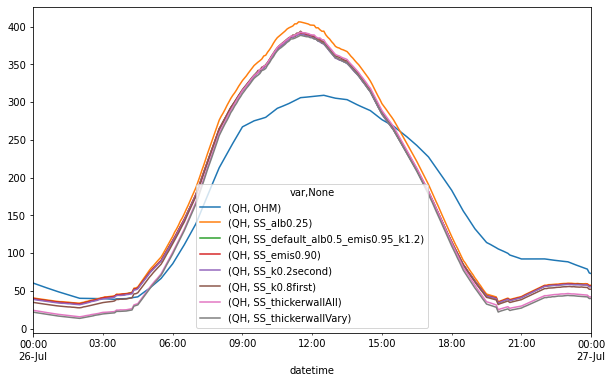

In [294]:
var = 'QH'

df_merge.loc[s:e,[var]].plot(figsize=(10,6))
#df_merge.loc['2012-07-24 11:00': '2012-07-24 11:30',[var]]


<AxesSubplot:xlabel='datetime'>

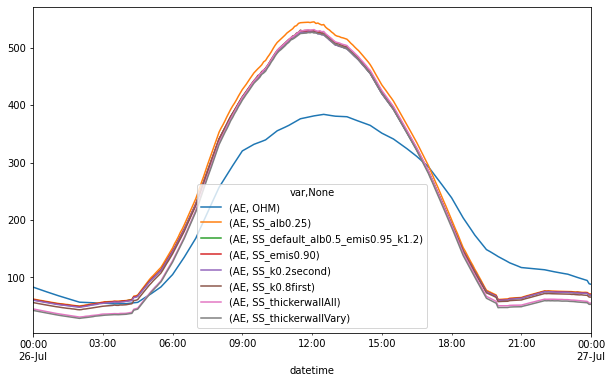

In [295]:
var = 'AE'

df_merge.loc[s:e,[var]].plot(figsize=(10,6))
#df_merge.loc['2012-07-24 11:00': '2012-07-24 11:30',[var]]


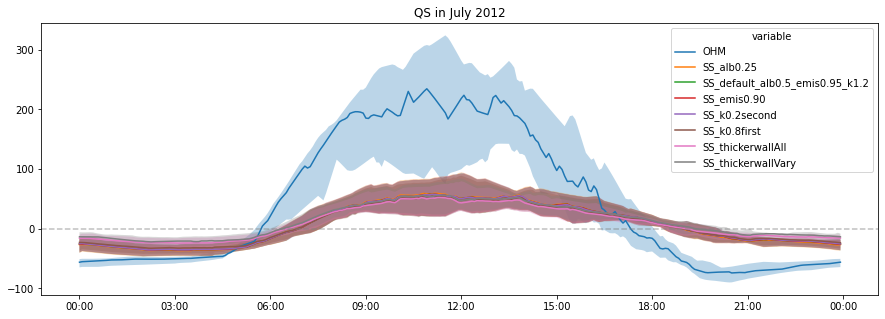

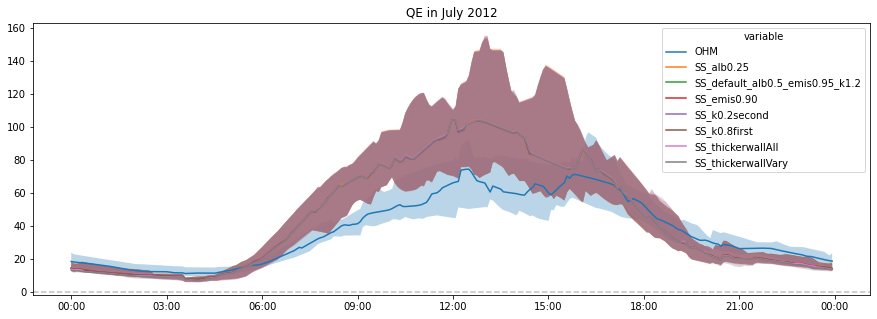

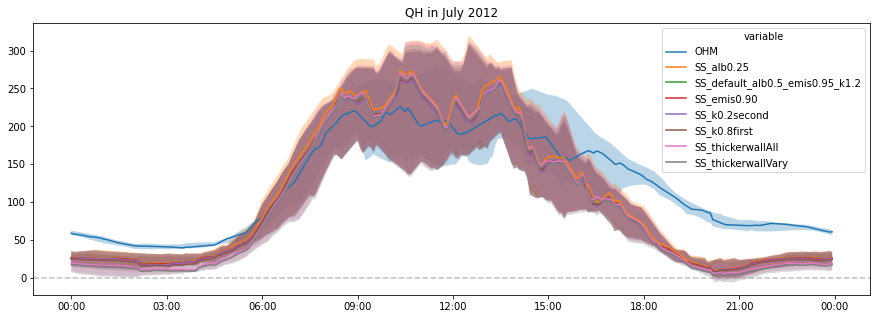

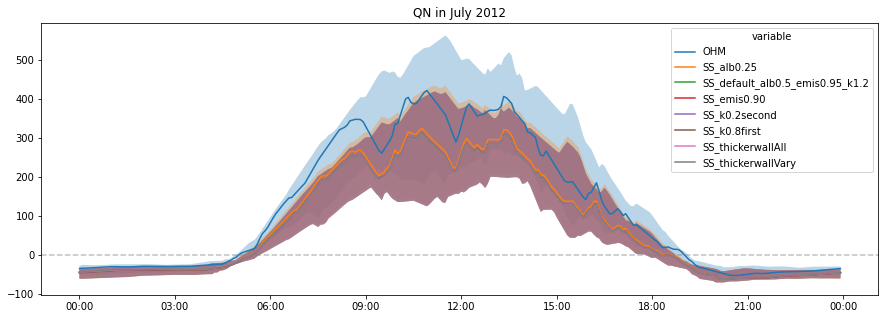

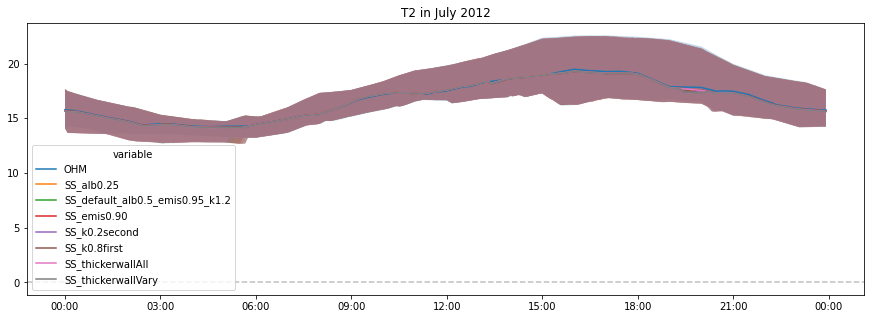

In [296]:

for var in ['QS','QE','QH', 'QN', 'T2']:
    fig, ax = plt.subplots(figsize=(15,5))
    fig,ax=sp.util.plot_day_clm(df_merge.loc['2012 7',var],fig=fig)
    _=ax.set_title(var + ' in July 2012')
    ax.axhline(0,0, linestyle = '--', color = 'grey', alpha = 0.5)
    



# Kville

In [3]:
kv_rc = in_folder + 'kville/RunControl.nml'        
kvt_rc = in_folder + 'kville_t/RunControl.nml'        

df_state_init_kv = sp.init_supy(kv_rc)
df_state_init_kvt = sp.init_supy(kvt_rc)


2023-08-31 15:52:30,361 - SuPy - INFO - All cache cleared.
2023-08-31 15:52:31,416 - SuPy - INFO - All cache cleared.


In [28]:
# Metdata 
grid = df_state_init_kv.index[1]
df_forcing = sp.load_forcing_grid(kv_rc, grid)

2023-08-31 15:58:28,036 - SuPy - INFO - All cache cleared.


In [29]:
df_forcing = df_forcing.loc['2018-05-28':'2018-06-05']

df_forcing

,iy,id,it,imin,qn,qh,qe,qs,qf,U,...,snow,ldown,fcld,Wuh,xsmd,lai,kdiff,kdir,wdir,isec
2018-05-28 00:00:00,2018,148,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,1.600000,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-05-28 00:05:00,2018,148,0,5,-999.0,-999.0,-999.0,-999.0,-999.0,1.558333,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-05-28 00:10:00,2018,148,0,10,-999.0,-999.0,-999.0,-999.0,-999.0,1.516667,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-05-28 00:15:00,2018,148,0,15,-999.0,-999.0,-999.0,-999.0,-999.0,1.475000,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-05-28 00:20:00,2018,148,0,20,-999.0,-999.0,-999.0,-999.0,-999.0,1.433333,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-05 23:35:00,2018,156,23,35,-999.0,-999.0,-999.0,-999.0,-999.0,1.108333,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-06-05 23:40:00,2018,156,23,40,-999.0,-999.0,-999.0,-999.0,-999.0,1.066667,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-06-05 23:45:00,2018,156,23,45,-999.0,-999.0,-999.0,-999.0,-999.0,1.025000,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-06-05 23:50:00,2018,156,23,50,-999.0,-999.0,-999.0,-999.0,-999.0,0.983333,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0


In [30]:
df_output_kv, df_state_final_kv = sp.run_supy(df_forcing, df_state_init_kv)
df_output_kvt, df_state_final_kvt = sp.run_supy(df_forcing, df_state_init_kvt)

2023-08-31 15:58:41,529 - SuPy - INFO - ====================
2023-08-31 15:58:41,530 - SuPy - INFO - Simulation period:
2023-08-31 15:58:41,531 - SuPy - INFO -   Start: 2018-05-28 00:00:00
2023-08-31 15:58:41,531 - SuPy - INFO -   End: 2018-06-05 23:55:00
2023-08-31 15:58:41,533 - SuPy - INFO - 
2023-08-31 15:58:41,533 - SuPy - INFO - No. of grids: 15
2023-08-31 15:58:41,535 - SuPy - INFO - SuPy is running in serial mode


# Säve

In [43]:
o_list = [df_output_s2, df_output_s3, df_output_s3x,df_output_s4, df_output_s5, df_output_s6, ]
st_list = [df_state_final_s2, df_state_final_s3, df_state_final_s3x,df_state_final_s4, df_state_final_s5, df_state_final_s6, ]
rc_list = [s2_rc,s3_rc, s3x_rc, s4_rc, s5_rc, s6_rc]

for output, state_final, runcontrol in zip(o_list, st_list, rc_list):
    sp.save_supy(output, state_final, path_runcontrol=runcontrol)

# sp.save_supy(df_output_w, df_state_final_w, path_runcontrol=path_runcontrol_w)
# sp.save_supy(df_output_wu, df_state_final_wu, path_runcontrol=path_runcontrol_wu)

